In [ ]:
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
from keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


#Автокодировщик

In [ ]:
# Функция базового автокодировщика
def baseAutoencoder():
    img_input = Input((28,28,1))
# уменьшаем
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    
# разжимаем
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
# финальная стадия разжатия - 1 нейпре
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(),
                  loss='mean_squared_error')

    return model

In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()

xTrainMnist = xTrainMnist.astype('float32')/255

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1)

In [ ]:
modelAutoMnist = baseAutoencoder()
#modelAutoMnist = denoiseAutoencoder()
modelAutoMnist.fit(xTrainMnist[:10000], xTrainMnist[:10000], epochs=100, batch_size=100)

Epoch 1/100
10000/10000 [==============================] - 3s 267us/step - loss: 0.0878
Epoch 2/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0383
Epoch 3/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0236
Epoch 4/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0199
Epoch 5/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.0182
Epoch 6/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0171
Epoch 7/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0163
Epoch 8/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0156
Epoch 9/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.0151
Epoch 10/100
10000/10000 [==============================] - 1s 69us/step - loss: 0.0147
Epoch 11/100
10000/10000 [==============================] - 1s 70us/step - loss: 0.0143
Epoch 12/100
10000/10000 [==============

In [ ]:
predMnist = modelAutoMnist.predict(xTrainMnist[:12000])

predMnist = predMnist * 255
predMnist = predMnist.astype('uint8')

In [ ]:
def plotImages(startIndex, xTrain, pred):
  n = 5  # Количество картинок, которые хотим показать
  plt.figure(figsize=(10, 4))
  for i in range(n):
      index = i + startIndex
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(xTrain[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(pred[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

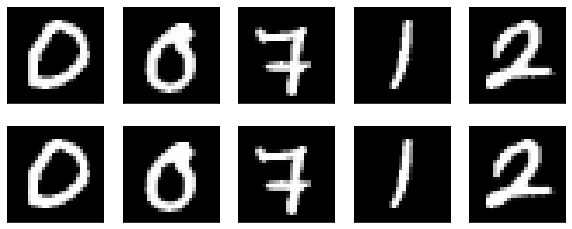

In [ ]:
plotImages(2100, xTrainMnist, predMnist)

In [ ]:
def getMSE(x1, x2):
  x1 = x1.flatten()
  x2 = x2.flatten()
  delta = x1 - x2
  return sum(delta ** 2) / len(delta)

In [ ]:
x1 = np.array([0, 1, 1])
x2 = np.array([1, 1, 0])
print(getMSE(x1,x2))

In [ ]:
err = [getMSE(xTrainMnist[i], predMnist[i] / 255) for i in range(len(predMnist))]
print(err[0:20])
print(err[2100:2120])

[0.001120605127760964, 0.0013049925752465013, 0.0005815855372068271, 0.0003866448432990509, 0.0006953957650266075, 0.0009642288285979817, 0.0003309362863493582, 0.0007487897271022318, 0.0004744446731287623, 0.0009105406472579135, 0.0012007548161572365, 0.0006735047063231575, 0.0008143649753302464, 0.001344008170975819, 0.00017695312887920796, 0.0008427684607932172, 0.0009049110006678542, 0.0011410250201705165, 0.0004998862298943878, 0.0006607152411640446]
[0.001117348910736763, 0.0009726439601129924, 0.0015692159754596867, 0.0003712072695586263, 0.0015570345842129086, 0.0013791398797954261, 0.0012516182675824607, 0.0009272925177532642, 0.0007979662537020368, 0.0013731766502577424, 0.0002516496785738171, 0.0013964016989320269, 0.002056685416975339, 0.0011531475149396946, 0.000954303283739181, 0.0008704854414255591, 0.0011662704528451787, 0.002450646846872808, 0.0013308657105783237, 0.000909638346235344]


In [ ]:
(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()

xTrainMnistF = xTrainMnistF.astype('float32')/255

xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1)

In [ ]:
n = 0
xxT = xTrainMnistF[n].reshape((28,28))
xxT = xxT * 255

img = Image.fromarray(xxT)
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
predMnistF = modelAutoMnist.predict(xTrainMnistF[:100])

predMnistF = predMnistF * 255
predMnistF = predMnistF.astype('uint8')

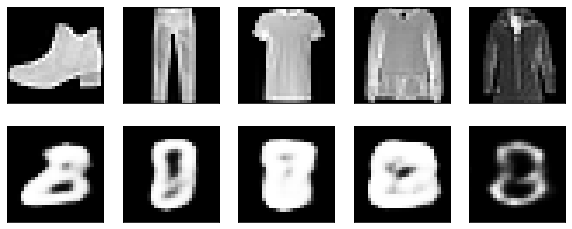

In [ ]:
plotImages(0, xTrainMnistF, predMnistF)

In [ ]:
errF = [getMSE(xTrainMnistF[i], predMnistF[i] / 255) for i in range(len(predMnistF))]
print("Ошибка на Mnist:", err[0:20])
print("Ошибка на одежде:", errF[0:20])
print("Средняя ошибка на Mnist:", round(sum(err) / len(err), 4))
print("Средняя ошибка на одежде:", round(sum(errF) / len(errF), 4))
print("Максимальная ошибка на Mnist:", round(max(err),4))
print("Минимальная ошибка на одежде:", round(min(errF),4))

Ошибка на Mnist: [0.001120605127760964, 0.0013049925752465013, 0.0005815855372068271, 0.0003866448432990509, 0.0006953957650266075, 0.0009642288285979817, 0.0003309362863493582, 0.0007487897271022318, 0.0004744446731287623, 0.0009105406472579135, 0.0012007548161572365, 0.0006735047063231575, 0.0008143649753302464, 0.001344008170975819, 0.00017695312887920796, 0.0008427684607932172, 0.0009049110006678542, 0.0011410250201705165, 0.0004998862298943878, 0.0006607152411640446]
Ошибка на одежде: [0.14101880133924966, 0.16456137537888316, 0.04974497685797351, 0.09097617661961088, 0.08323515729088217, 0.16241600807271103, 0.03962863635986176, 0.14989519450640132, 0.04485523769242572, 0.1190780052788768, 0.1261477144856107, 0.15455884399036515, 0.055044940692018145, 0.03741022049831859, 0.03520094389814329, 0.10817179974997183, 0.09992993355672317, 0.11314490527547133, 0.13016528189571455, 0.04514305826027129]
Средняя ошибка на Mnist: 0.0011
Средняя ошибка на одежде: 0.096
Максимальная ошибка н

In [ ]:
bias = 0.008

isMnist = [e < bias for e in err]
isMnistF = [e < bias for e in errF]

print("Mnist распознано, как Mnist: ", round(100*sum(isMnist) / len(isMnist)),"%", sep="")
print("Одежды распознано, как Mnist: ", round(100*sum(isMnistF) / len(isMnistF)),"%", sep="")
print("Суммарная ошибка: ", round(100*(1-(sum(isMnist) / len(isMnist)) + sum(isMnistF) / len(isMnistF))),"%", sep="")


Mnist распознано, как Mnist: 100.0%
Одежды распознано, как Mnist: 0.0%
Суммарная ошибка: 0.0%


#Генерация из шума

In [ ]:
noise = np.random.sample((100,28,28,1))
print(noise.shape)

(100, 28, 28, 1)


In [ ]:
predNoise = modelAutoMnist.predict(noise[:100])

predNoise = predNoise * 255
predNoise = predNoise.astype('uint8')

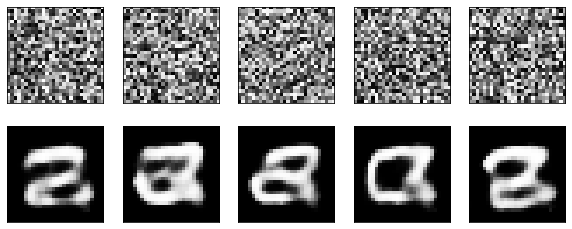

In [ ]:
plotImages(0, noise, predNoise)

In [ ]:
errN = [getMSE(noise[i], predNoise[i] / 255) for i in range(len(predMnistF))]
print("Ошибка на Mnist:", err[0:20])
print("Ошибка на шуме:", errN[0:20])
print("Средняя ошибка на Mnist:", round(sum(err) / len(err), 4))
print("Средняя ошибка на шуме:", round(sum(errN) / len(errN), 4))
print("Максимальная ошибка на Mnist:", round(max(err),4))
print("Минимальная ошибка на шуме:", round(min(errN),4))

Ошибка на Mnist: [0.001120605127760964, 0.0013049925752465013, 0.0005815855372068271, 0.0003866448432990509, 0.0006953957650266075, 0.0009642288285979817, 0.0003309362863493582, 0.0007487897271022318, 0.0004744446731287623, 0.0009105406472579135, 0.0012007548161572365, 0.0006735047063231575, 0.0008143649753302464, 0.001344008170975819, 0.00017695312887920796, 0.0008427684607932172, 0.0009049110006678542, 0.0011410250201705165, 0.0004998862298943878, 0.0006607152411640446]
Ошибка на шуме: [0.28099441815939974, 0.27874224158225885, 0.29035800968928116, 0.2746113017114272, 0.2793749312132516, 0.26430940658724345, 0.26790058733305855, 0.2795612733979295, 0.28026728269993445, 0.27898463131986506, 0.2717668291259701, 0.2667784837698063, 0.2633780368146524, 0.2980950068500555, 0.2806361865381466, 0.2605301010359281, 0.2824820620912705, 0.27725715532402195, 0.2673779196089355, 0.27378310237312814]
Средняя ошибка на Mnist: 0.0011
Средняя ошибка на шуме: 0.2766
Максимальная ошибка на Mnist: 0.00

#Удаление шума

In [ ]:
def addNoise(x, noiseVal):
  #noise = np.random.sample((x.shape[0],28,28,1))
  noise = np.random.normal(loc=0.5, scale=0.5, size=x.shape)
  
  return np.clip(x + noiseVal * noise, 0., 1.)

In [ ]:
noisedXTrainMnist = addNoise(xTrainMnist, 1)

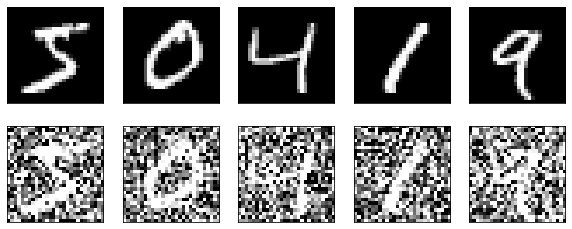

In [ ]:
plotImages(0, xTrainMnist, noisedXTrainMnist)

In [ ]:
def denoiseAutoencoder():
    img_input = Input((28,28,1))
# сжимаем
    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x)

    x = Dense(16, activation='relu')(x)# скрытое пространство 

    x = Dense(3136, activation='relu')(x)
    x = Reshape((7,7,64))(x)
    
# расжимаем
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)

# финальный этап разжимания  
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam',
                  loss='mse')

    return model

In [ ]:
modelDenoiseMnist = denoiseAutoencoder()
modelDenoiseMnist.fit(noisedXTrainMnist[:2000], xTrainMnist[:2000], epochs=100, batch_size=100)

Epoch 1/100
2000/2000 [==============================] - 2s 887us/step - loss: 0.1476
Epoch 2/100
2000/2000 [==============================] - 0s 92us/step - loss: 0.0749
Epoch 3/100
2000/2000 [==============================] - 0s 75us/step - loss: 0.0676
Epoch 4/100
2000/2000 [==============================] - 0s 74us/step - loss: 0.0670
Epoch 5/100
2000/2000 [==============================] - 0s 71us/step - loss: 0.0668
Epoch 6/100
2000/2000 [==============================] - 0s 73us/step - loss: 0.0667
Epoch 7/100
2000/2000 [==============================] - 0s 78us/step - loss: 0.0666
Epoch 8/100
2000/2000 [==============================] - 0s 73us/step - loss: 0.0666
Epoch 9/100
2000/2000 [==============================] - 0s 74us/step - loss: 0.0665
Epoch 10/100
2000/2000 [==============================] - 0s 73us/step - loss: 0.0662
Epoch 11/100
2000/2000 [==============================] - 0s 71us/step - loss: 0.0656
Epoch 12/100
2000/2000 [==============================] - 0s 7

In [ ]:
predMnistDenoise = modelDenoiseMnist.predict(noisedXTrainMnist[:4000])

predMnistDenoise = predMnistDenoise * 255
predMnistDenoise = predMnistDenoise.astype('uint8')

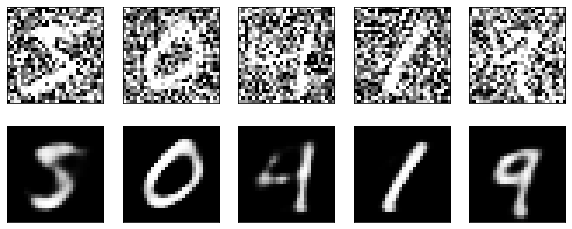

In [ ]:
plotImages(0, noisedXTrainMnist, predMnistDenoise)

In [ ]:
noisedXTrainMnistF = addNoise(xTrainMnistF, 0.2)

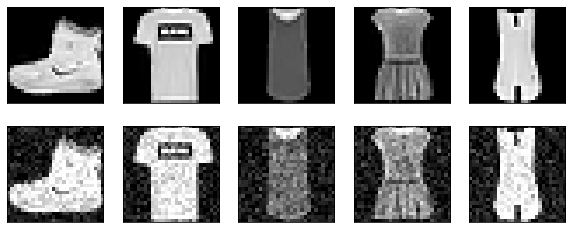

In [ ]:
plotImages(0, xTrainMnistF, noisedXTrainMnistF)

In [ ]:
predMnistFDenoise = modelDenoiseMnist.predict(noisedXTrainMnistF[:4000])

predMnistFDenoise = predMnistFDenoise * 255
predMnistFDenoise = predMnistFDenoise.astype('uint8')

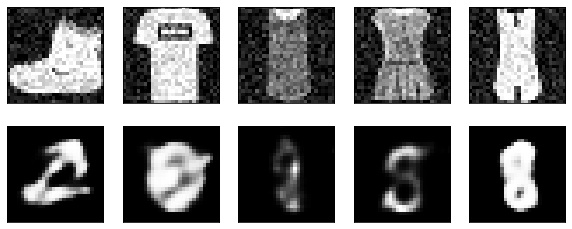

In [ ]:
plotImages(0, noisedXTrainMnistF, predMnistFDenoise)

#Определение мошеннеческих операций

In [ ]:
file = files.upload()
!ls

Saving creditcard.csv to creditcard.csv
creditcard.csv	sample_data


In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df[0:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Удаляем столбец со временем
data = df.drop(['Time'], axis=1)
# Нормализуем столбец с суммой транзакции
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

frauds = data[data.Class == 1]
normal = data[data.Class == 0]

In [ ]:
frauds.shape

(492, 30)

In [ ]:
normal.shape

(284315, 30)

In [ ]:
RANDOM_SEED = 42

X_train, X_test = train_test_split(normal, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# Удаляем класс в обучающем наборе данных
X_train = X_train.drop(['Class'], axis=1)
# Добавляем все мошеннические транзакции в тестовый набор данных
X_test = pd.concat([X_test, frauds])
# Делаем метки для тестового набора данных
y_test = X_test['Class']
# Удаляем класс у тестового набора данных
X_test = X_test.drop(['Class'], axis=1)
# Преобразуем данные в массивы numpy
X_train = X_train.values
X_test = X_test.values


In [ ]:
print(X_train.shape)

(227452, 29)


In [ ]:
def creditcardAutoencoder():
  dataSize = X_train.shape[1]
  dataInput = Input(shape=(dataSize, ))
  
  x = Dense(10, activation='relu')(dataInput)
  x = Dense(dataSize, activation='relu')(x)
  
  autoencoder = Model(inputs=dataInput, outputs=x)
  
  autoencoder.compile(optimizer='Adam', loss='mse')
  
  return autoencoder

In [ ]:
model = creditcardAutoencoder()
history = model.fit(X_train, X_train,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
227452/227452 [==============================] - 23s 101us/step - loss: 0.7334
Epoch 2/10
227452/227452 [==============================] - 21s 94us/step - loss: 0.6608
Epoch 3/10
227452/227452 [==============================] - 21s 94us/step - loss: 0.6545
Epoch 4/10
227452/227452 [==============================] - 22s 95us/step - loss: 0.6528
Epoch 5/10
227452/227452 [==============================] - 22s 95us/step - loss: 0.6522
Epoch 6/10
227452/227452 [==============================] - 22s 97us/step - loss: 0.6517
Epoch 7/10
227452/227452 [==============================] - 22s 95us/step - loss: 0.6515
Epoch 8/10
227452/227452 [==============================] - 22s 95us/step - loss: 0.6511
Epoch 9/10
227452/227452 [==============================] - 21s 94us/step - loss: 0.6510
Epoch 10/10
227452/227452 [==============================] - 21s 94us/step - loss: 0.6507


In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [ ]:
mse_normal = mse[y_test.values == 0]
mse_frauds = mse[y_test.values == 1]

In [ ]:
print("Минимальная ошибка нормальных трансакций:", round(min(mse_normal),4))
print("Минимальная ошибка нормальных трансакций:", round(max(mse_normal),4))
print("Средняя ошибка нормальных трансакций:", round(sum(mse_normal) / len(mse_normal),4))

Минимальная ошибка нормальных трансакций: 0.0379
Минимальная ошибка нормальных трансакций: 829.1917
Средняя ошибка нормальных трансакций: 0.6537


In [ ]:
print("Минимальная ошибка мошеннических трансакций:", round(min(mse_frauds),4))
print("Минимальная ошибка мошеннических трансакций:", round(max(mse_frauds),4))
print("Средняя ошибка мошеннических трансакций:", round(sum(mse_frauds) / len(mse_frauds),4))

Минимальная ошибка мошеннических трансакций: 0.0988
Минимальная ошибка мошеннических трансакций: 276.3441
Средняя ошибка мошеннических трансакций: 27.3656


In [ ]:
def getAccByBias(bias):
  isNormal = mse_normal < bias
  isFrauds = mse_frauds > bias

  accNormal = sum(isNormal) / len(isNormal)
  accFaruds = sum(isFrauds) / len(isFrauds)

  print("Распознано нормальных трансакций: ", round(100*accNormal), "%", sep="")
  print("Распознано мошеннических трансакций: ", round(100*accFaruds), "%", sep="")
  print("Средняя accuracy распознавания: ", round(50*(accNormal + accFaruds)), "%", sep="")

In [ ]:
getAccByBias(2.5)

Распознано нормальных трансакций: 97.0%
Распознано мошеннических трансакций: 84.0%
Средняя ошибка распознавания: 91.0%
